<a href="https://colab.research.google.com/github/MercyCherotich/ML-PROJECTS/blob/main/bmi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
class GenerateData:
    
    def height(self):
        high = 220
        low = 150
        df = pd.DataFrame(np.random.randint(low, high, size=(1000, 1)), columns=["height"])
        df.to_csv("height.csv", index=False)
        return True
    
    def weight(self):
        high = 200
        low = 40
        df = pd.DataFrame(np.random.randint(low, high, size=(1000, 1)), columns=["weight"])
        df.to_csv("weight.csv", index=False)
        return True
    
    def exercise(self):
        ccc = [1, 0]
        df = pd.DataFrame(np.random.choice(ccc, size=1000),columns=['Exercise'])
        df.to_csv("exercise.csv", index=False)
        return True
    
    def diet(self):
        ccc = [1, 0]
        df = pd.DataFrame(np.random.choice(ccc, size=1000),columns=['Diet'])
        df.to_csv("diet.csv", index=False)
        return True
        
    def bmi(self):
        low = 18
        high = 33
        df = pd.DataFrame(np.random.randint(low, high, size=(1000, 1)), columns=["BMI"])
        df.to_csv("bmi.csv", index=False)
        return True
        pass
        

In [4]:
gg = GenerateData()
gg.height()
gg.weight()
gg.exercise()
gg.diet()
gg.bmi()

True

In [9]:
height = pd.read_csv("height.csv")
weight = pd.read_csv("weight.csv")
exercise = pd.read_csv("exercise.csv")
diet = pd.read_csv("diet.csv")
bmi = pd.read_csv("bmi.csv")

dfheight = pd.DataFrame(height)
dfweight = pd.DataFrame(weight)
dfexercise = pd.DataFrame(exercise)
dfdiet = pd.DataFrame(diet)
dfbmi = pd.DataFrame(bmi)

concat = pd.concat([dfheight, dfweight, dfexercise, dfdiet, dfbmi], axis=1).reindex(dfheight.index)
concat.to_csv("bmi_pred.csv", index=False)
concat = pd.concat([dfheight, dfweight, dfexercise, dfdiet], axis=1).reindex(dfheight.index)
concat.to_csv("bmi_test.csv", index=False)
print("200 0K")


200 0K


In [10]:
dfff = pd.read_csv("bmi_pred.csv")
dfff.head()

,height,weight,Exercise,Diet,BMI
0,219,60,0,0,31
1,189,122,1,1,18
2,196,61,1,1,29
3,211,176,0,1,32
4,161,131,0,0,31


In [11]:
dggg = pd.read_csv("bmi_test.csv")
dggg.head()

,height,weight,Exercise,Diet
0,219,60,0,0
1,189,122,1,1
2,196,61,1,1
3,211,176,0,1
4,161,131,0,0


In [13]:
class Train:
    def __init__(self, train, test, output):
        self.train = train
        self.test = test
        self.output = output
    
    def trainer(self):
        data = pd.read_csv(self.train)
        array = data.values
        df = pd.DataFrame(array)
        maindf = df[[0,1,2,3]]
        mainarray = maindf.values
        tempdf = df[4]
        
        train_y = tempdf.values
        for i in range(len(train_y)):
            train_y[i] = str(train_y[i])
        self.learn = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=1000)
        self.learn.fit(mainarray, train_y)
        print(self.learn.fit(mainarray, train_y))
        print("Train \n \t200 OK")
  
    def tester(self):
        testdata = pd.read_csv(self.test)
        tester_array = testdata.values
        dft = pd.DataFrame(tester_array)
        testdf = dft[[0,1,2,3]]
        maintestarray = testdf.values
        self.x_predict = self.learn.predict(maintestarray)
        for i in range(len(self.x_predict)):
            self.x_predict[i] = str(self.x_predict[i])
        print("Test \n \t200 OK")
    
    def back_to_df(self):
        self.bdf = pd.DataFrame(self.x_predict, columns=['Predictes BMI'])
        self.bdf.index = self.bdf.index
        self.bdf.to_csv(self.output, index=False)
    def combine_data(self):
        main = pd.read_csv(self.test)
        dataframe = pd.DataFrame(main)
        dataframe2 = self.bdf
        concat = pd.concat([dataframe,dataframe2], axis=1).reindex(dataframe.index)
        concat.to_csv(self.output, index=False)
        print(" \033[92m Done successfully")

In [14]:
data="/content/bmi_pred.csv"
test ="/content/bmi_test.csv"
output = "output.csv"

train = Train(data, test, output)
train.trainer()
train.tester()
train.back_to_df()
train.combine_data()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Train 
 	200 OK
Test 
 	200 OK
  Done successfully


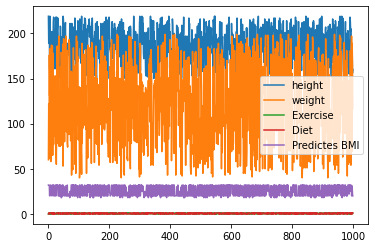

In [15]:
mercy = pd.read_csv("/content/output.csv")
mercy.plot()
plt.show()